In [32]:
import numpy as np

expect = np.array([0.8,1.9,-10,13])
predict = np.array([0.8,1.9,-10,12])

sum = 0

for i in range(len(expect)):
    sum +=(expect[i] - predict[i])**2


error = sum/(len(expect))

print('Mean squared error:',error)
print(expect.mean())

Mean squared error: 0.25
1.425


In [34]:
# Absolute Error
import numpy as np

# Create numpy arrays for the actual and predicted values
expect = np.array([12.5,0.5,13.2,1])
predict = np.array([11,0.5,1.2,4])

sum = 0

# for loop for iteration
for i in range(len(expect)):
    sum += abs(expect[i] - predict[i])

error = sum / len(expect)

# Result
print('Absolute Error: ', error)


Absolute Error:  4.125


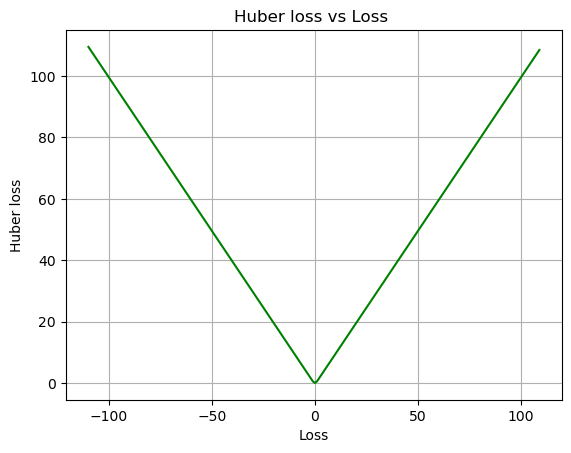

In [16]:
# Huber loss
import matplotlib.pyplot as plt
import numpy as np

# Huber loss function
def huber_loss(predict, target, delta):
    huber_mse = 0.5 * (target - predict) ** 2
    huber_mae = delta * (np.abs(target - predict) - 0.5 * delta)
    return np.where(np.abs(target - predict) <= delta, huber_mse, huber_mae)

predict = np.array([i for i in range(-110, 110)])
target = np.array([2 * i for i in range(-110, 110)])
delta = 1

y_huber = huber_loss(predict, target, delta)
loss = target - predict
plt.plot(loss, y_huber, 'green')
plt.grid(True, which='major')
plt.title('Huber loss vs Loss ')
plt.ylabel('Huber loss')
plt.xlabel('Loss')
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_17016\2712951799.py:6: RuntimeWarning: divide by zero encountered in log
  loss = -1 * (target * np.log(predict) + (1 - target) * np.log(1 - predict))
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17016\2712951799.py:6: RuntimeWarning: invalid value encountered in multiply
  loss = -1 * (target * np.log(predict) + (1 - target) * np.log(1 - predict))


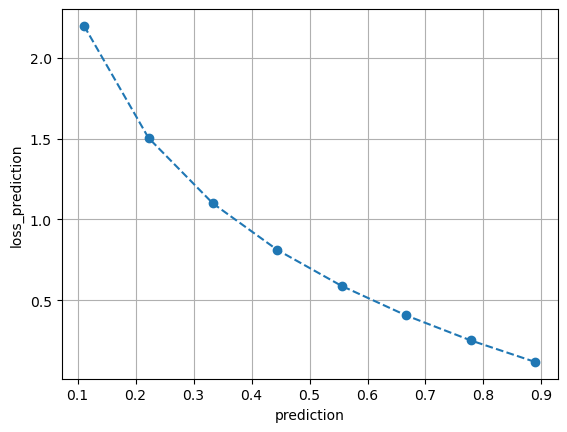

In [17]:
# Binary cross entropy
import numpy as np
import matplotlib.pyplot as plt

def binary_cross_entropy(target, predict):
    loss = -1 * (target * np.log(predict) + (1 - target) * np.log(1 - predict))
    return loss

target = np.ones(10)
predict = np.linspace(0., 1., 10)
loss_binary = binary_cross_entropy(target, predict)

plt.plot(predict, loss_binary, "o--")
plt.xlabel("prediction")
plt.ylabel("loss_prediction")
plt.grid()
plt.show()


In [15]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt

iterations = 100
learning_rate = 0.0001
stopping_threshold = 1e-6

def mean_squared_error(y_true, y_predicted):
    # Calculating the loss (Mean squared error)
    cost = np.sum((y_true - y_predicted) ** 2) / len(y_true)
    return cost

def gradient_descent(x, y, iterations, learning_rate, stopping_threshold):
    # Initializing weight, bias, learning rate and iterations
    current_weight = 0.1
    current_bias = 0.01
    iterations = iterations
    learning_rate = learning_rate
    n = float(len(x))
    costs = []
    weights = []
    previous_cost = None

    # Estimation of optimal parameters
    for i in range(iterations):
        # Making predictions
        y_predicted = (current_weight * x) + current_bias
        
        # Calculating the current cost
        current_cost = mean_squared_error(y, y_predicted)
        
        # If the change in cost is less than or equal to
        # stopping_threshold we stop the gradient descent
        if previous_cost and abs(previous_cost - current_cost) <= stopping_threshold:
            break

        previous_cost = current_cost

        costs.append(current_cost)
        weights.append(current_weight)

        # Calculating the gradients
        weight_derivative = -(2/n) * sum(x * (y - y_predicted))
        bias_derivative = -(2/n) * sum(y - y_predicted)

        # Updating weights and bias
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)
          
        
        print(f"Iteration {i+1}: Cost {current_cost}, Weight \
        {current_weight}, Bias {current_bias}")

    # Visualizing the weights and cost at for all iterations
    plt.figure(figsize = (8,6))
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker='o', color='red')
    plt.title('Loss vs Weights')
    plt.ylabel('Loss')
    plt.xlabel('Weight')
    plt.show()

    return current_weight, current_bias

def main():

    # Data
    X = np.array([i for i in range(11)])
    Y = np.array([2*i for i in range(11)])

    # Estimating weight and bias using gradient descent
    estimated_weight, estimated_bias = gradient_descent(X, Y, iterations, learning_rate, stopping_threshold)
    print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")

    # Making predictions using estimated parameters
    Y_pred = estimated_weight * X + estimated_bias

    # Plotting the regression line
    plt.figure(figsize = (8,6))
    plt.scatter(X, Y, marker='o', color='red')
    plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue', markerfacecolor='red', 
             markersize=10,linestyle='dashed')
    plt.title('Prediction vs Target')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.show()
    print(X)
    print(Y)

if __name__=="__main__":
    main()


TypeError: 'numpy.int32' object is not callable

In [19]:
#优化自上面的代码
import numpy as np
import matplotlib.pyplot as plt

# 参数配置
iterations = 100
learning_rate = 0.0001
stopping_threshold = 1e-6

# 计算均方误差
def mean_squared_error(y_true, y_predicted):
    cost = np.sum((y_true - y_predicted) ** 2) / len(y_true)
    return cost

# 梯度下降算法
def gradient_descent(x, y, iterations, learning_rate, stopping_threshold):
    current_weight = 0.1
    current_bias = 0.01
    n = float(len(x))
    costs = []
    weights = []
    previous_cost = None

    for i in range(iterations):
        # 预测值
        y_predicted = (current_weight * x) + current_bias
        
        # 当前误差计算
        current_cost = mean_squared_error(y, y_predicted)
        
        # 判断是否达到停止条件
        if previous_cost and abs(previous_cost - current_cost) <= stopping_threshold:
            break

        previous_cost = current_cost

        costs.append(current_cost)
        weights.append(current_weight)

        # 计算梯度
        weight_derivative = -(2/n) * sum(x * (y - y_predicted))
        bias_derivative = -(2/n) * sum(y - y_predicted)

        # 更新权重和偏差
        current_weight -= learning_rate * weight_derivative
        current_bias -= learning_rate * bias_derivative
        
        print(f"Iteration {i+1}: Cost {current_cost}, Weight {current_weight}, Bias {current_bias}")

    # 绘制权重与损失的关系图
    plt.figure(figsize=(8, 6))
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker='o', color='red')
    plt.title('Loss vs Weights')
    plt.ylabel('Loss')
    plt.xlabel('Weight')
    plt.show()

    return current_weight, current_bias

def main():
    # 数据准备
    X = np.array([i for i in range(11)])
    Y = np.array([2*i for i in range(11)])

    # 使用梯度下降估计权重和偏差
    estimated_weight, estimated_bias = gradient_descent(X, Y, iterations, learning_rate, stopping_threshold)
    print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")

    # 使用估计的参数进行预测
    Y_pred = estimated_weight * X + estimated_bias

    # 绘制回归线
    plt.figure(figsize=(8, 6))
    plt.scatter(X, Y, marker='o', color='red')
    plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue', linestyle='dashed')
    plt.title('Prediction vs Target')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.show()

if __name__ == "__main__":
    main()


TypeError: 'numpy.int32' object is not callable

Iteration 1: Cost 126.16009999999997, Weight 0.11329, Bias 0.011898
Iteration 2: Cost 124.36427265010398, Weight 0.126485072, Bias 0.0137823304
Iteration 3: Cost 122.59401242552055, Weight 0.1395858941656, Bias 0.01565308886192
Iteration 4: Cost 120.84895532757132, Weight 0.15259313981757888, Bias 0.017510372349982015
Iteration 5: Cost 119.12874253982028, Weight 0.16550747746650585, Bias 0.01935427713569444
Iteration 6: Cost 117.4330203542943, Weight 0.1783295708471046, Bias 0.021184898802800795
Iteration 7: Cost 115.76144009875402, Weight 0.19106007895237206, Bias 0.02300233225219313
Iteration 8: Cost 114.11365806500004, Weight 0.20369965606745327, Bias 0.02480667170679032
Iteration 9: Cost 112.48933543820036, Weight 0.2162489518032743, Bias 0.026598010716381508
Iteration 10: Cost 110.88813822722324, Weight 0.228708611129935, Bias 0.028376442162434956
Iteration 11: Cost 109.30973719596244, Weight 0.24107927440986304, Bias 0.030142058262872536
Iteration 12: Cost 107.75380779563989, Wei

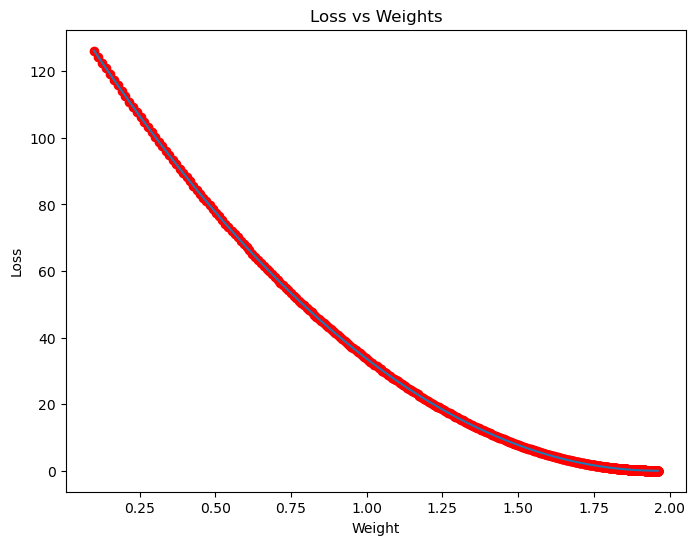

Estimated Weight: 1.9607338568472876
Estimated Bias: 0.26251844223727056


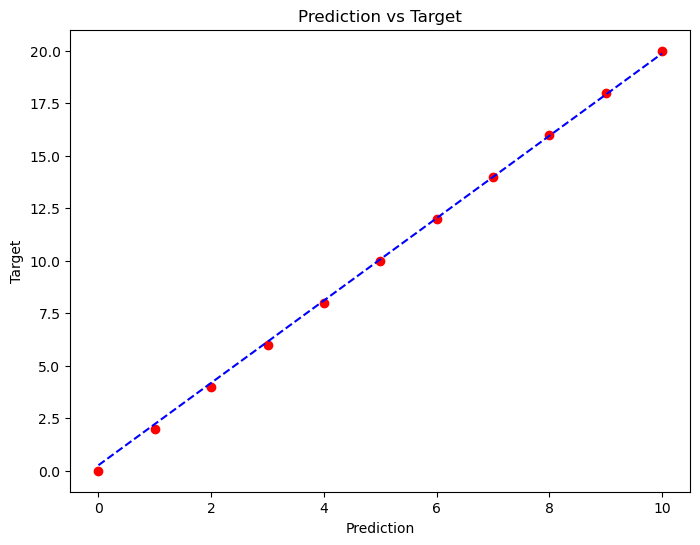

In [22]:
#将 sum 替换为 np.sum：np.sum 是 NumPy 提供的求和函数，可以避免与 Python 内置 sum 函数冲突，并确保对 NumPy 数组进行正确的操作。
import numpy as np
import matplotlib.pyplot as plt

# 参数配置
iterations = 1000
learning_rate = 0.0001
stopping_threshold = 1e-6

# 计算均方误差
def mean_squared_error(y_true, y_predicted):
    cost = np.sum((y_true - y_predicted) ** 2) / len(y_true)
    return cost

# 梯度下降算法
def gradient_descent(x, y, iterations, learning_rate, stopping_threshold):
    current_weight = 0.1
    current_bias = 0.01
    n = float(len(x))
    costs = []
    weights = []
    previous_cost = None

    for i in range(iterations):
        # 预测值
        y_predicted = (current_weight * x) + current_bias
        
        # 当前误差计算
        current_cost = mean_squared_error(y, y_predicted)
        
        # 判断是否达到停止条件
        if previous_cost and abs(previous_cost - current_cost) <= stopping_threshold:
            break

        previous_cost = current_cost

        costs.append(current_cost)
        weights.append(current_weight)

        # 计算梯度
        weight_derivative = -(2/n) * np.sum(x * (y - y_predicted))
        bias_derivative = -(2/n) * np.sum(y - y_predicted)

        # 更新权重和偏差
        current_weight -= learning_rate * weight_derivative
        current_bias -= learning_rate * bias_derivative
        
        print(f"Iteration {i+1}: Cost {current_cost}, Weight {current_weight}, Bias {current_bias}")

    # 绘制权重与损失的关系图
    plt.figure(figsize=(8, 6))
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker='o', color='red')
    plt.title('Loss vs Weights')
    plt.ylabel('Loss')
    plt.xlabel('Weight')
    plt.show()

    return current_weight, current_bias

def main():
    # 数据准备
    X = np.array([i for i in range(11)])
    Y = np.array([2*i for i in range(11)])

    # 使用梯度下降估计权重和偏差
    estimated_weight, estimated_bias = gradient_descent(X, Y, iterations, learning_rate, stopping_threshold)
    print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")

    # 使用估计的参数进行预测
    Y_pred = estimated_weight * X + estimated_bias

    # 绘制回归线
    plt.figure(figsize=(8, 6))
    plt.scatter(X, Y, marker='o', color='red')
    plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue', linestyle='dashed')
    plt.title('Prediction vs Target')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.show()

if __name__ == "__main__":
    main()
